In [168]:
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
#from ImageDataset import ImageDataset
from image_dataset import ImageDataset

# Set the path to the folder containing your unlabeled images
train_path = "data/DIV2K/train_HR"
test_path = "data/DIV2K/valid_HR"

# Define the transformation to be applied to each image
transform = transforms.Compose([
    #transforms.Resize((256, 256)),  # Resize the image to a fixed size
    transforms.RandomCrop((512,512)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()  # Convert the image to a tensor
])

# Create the ImageFolder dataset
train_data = ImageDataset(train_path, transform=transform)

test_data = ImageDataset(test_path, transform=transform)

In [169]:
from torch.utils.data import DataLoader
train_data_loader = DataLoader(dataset=train_data, 
                              batch_size=8, # how many samples per batch?
                              num_workers=1, # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True) # shuffle the data?

test_data_loader = DataLoader(dataset=test_data, 
                              batch_size=8, # how many samples per batch?
                              num_workers=1, # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True) # shuffle the data?

In [170]:
#img, label = train_data[0][0], train_data[0][1]
img = train_data[0]
#class_names = train_data.classes
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
#print(f"Image label: {label}")
#print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.2118, 0.2157, 0.2392,  ..., 0.2902, 0.3059, 0.3451],
         [0.2157, 0.2196, 0.2275,  ..., 0.2824, 0.3490, 0.4235],
         [0.2314, 0.2314, 0.2314,  ..., 0.3020, 0.3804, 0.4824],
         ...,
         [0.7608, 0.7569, 0.7569,  ..., 0.3255, 0.3412, 0.3765],
         [0.7529, 0.7647, 0.7765,  ..., 0.3412, 0.3451, 0.3137],
         [0.7490, 0.7725, 0.8000,  ..., 0.3294, 0.3333, 0.2863]],

        [[0.1412, 0.1294, 0.1373,  ..., 0.0863, 0.0902, 0.1098],
         [0.1490, 0.1373, 0.1255,  ..., 0.0784, 0.1294, 0.1725],
         [0.1490, 0.1333, 0.1255,  ..., 0.0902, 0.1451, 0.2314],
         ...,
         [0.3529, 0.3451, 0.3451,  ..., 0.0471, 0.0431, 0.0824],
         [0.3529, 0.3569, 0.3647,  ..., 0.0627, 0.0627, 0.0588],
         [0.3490, 0.3647, 0.3922,  ..., 0.0667, 0.0745, 0.0431]],

        [[0.1490, 0.1333, 0.1451,  ..., 0.1333, 0.1725, 0.2667],
         [0.1490, 0.1412, 0.1412,  ..., 0.1451, 0.2353, 0.3333],
         [0.1647, 0.1569, 0.1529,  ..., 0.14

Original shape: torch.Size([3, 512, 512]) -> [color_channels, height, width]
Image permute shape: torch.Size([512, 512, 3]) -> [height, width, color_channels]


(-0.5, 511.5, 511.5, -0.5)

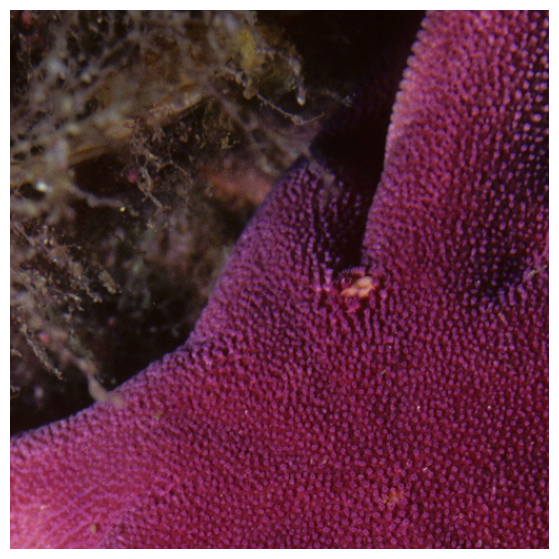

In [171]:
# Rearrange the order of dimensions
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
#plt.title(class_names[label], fontsize=14)

In [172]:
next(iter(train_data_loader)).shape

torch.Size([8, 3, 512, 512])

In [173]:
from pathlib import Path
# Create models directory (if it doesn't already exist), see: https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                exist_ok=True # if models directory already exists, don't error
)

# Create model save path
MODEL_NAME = "my_upscale.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

In [174]:
from autoencoder_upscale_model import AutoencoderUpscaleModel
import torch
from my_upscale_model import UpscaleModel
from train_autoencoder import downsample_image

device = "cpu"

batch = next(iter(test_data_loader))

model = UpscaleModel()

model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

model.to(device)

img = downsample_image(batch)
model.eval()
with torch.inference_mode():
    result = model(img.to(device))



Original shape: torch.Size([3, 256, 256]) -> [color_channels, height, width]
Image permute shape: torch.Size([256, 256, 3]) -> [height, width, color_channels]


(-0.5, 255.5, 255.5, -0.5)

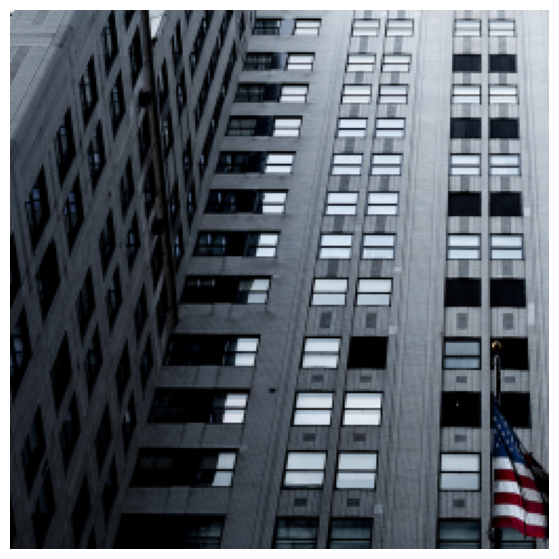

In [175]:
img = downsample_image(batch)[1]
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")

In [176]:
img

tensor([[[0.9059, 0.8431, 0.5382,  ..., 0.8333, 0.8010, 0.7716],
         [0.6127, 0.5588, 0.5147,  ..., 0.8480, 0.8147, 0.7873],
         [0.1461, 0.5402, 0.5196,  ..., 0.8510, 0.8255, 0.8049],
         ...,
         [0.0000, 0.0343, 0.0765,  ..., 0.3608, 0.2245, 0.3392],
         [0.0010, 0.0539, 0.0833,  ..., 0.3520, 0.2353, 0.3608],
         [0.0108, 0.0775, 0.0627,  ..., 0.3667, 0.2520, 0.3461]],

        [[0.9353, 0.8706, 0.5716,  ..., 0.8520, 0.8196, 0.7902],
         [0.6363, 0.5863, 0.5588,  ..., 0.8676, 0.8324, 0.8088],
         [0.1657, 0.5882, 0.5735,  ..., 0.8686, 0.8431, 0.8225],
         ...,
         [0.0000, 0.0422, 0.0912,  ..., 0.3902, 0.2471, 0.3686],
         [0.0010, 0.0686, 0.0990,  ..., 0.3765, 0.2559, 0.3941],
         [0.0147, 0.0941, 0.0814,  ..., 0.3931, 0.2755, 0.3794]],

        [[0.9559, 0.9059, 0.6196,  ..., 0.8765, 0.8412, 0.8127],
         [0.6627, 0.6402, 0.6098,  ..., 0.8922, 0.8608, 0.8304],
         [0.1873, 0.6353, 0.6186,  ..., 0.8931, 0.8706, 0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original shape: torch.Size([3, 512, 512]) -> [color_channels, height, width]
Image permute shape: torch.Size([512, 512, 3]) -> [height, width, color_channels]


(-0.5, 511.5, 511.5, -0.5)

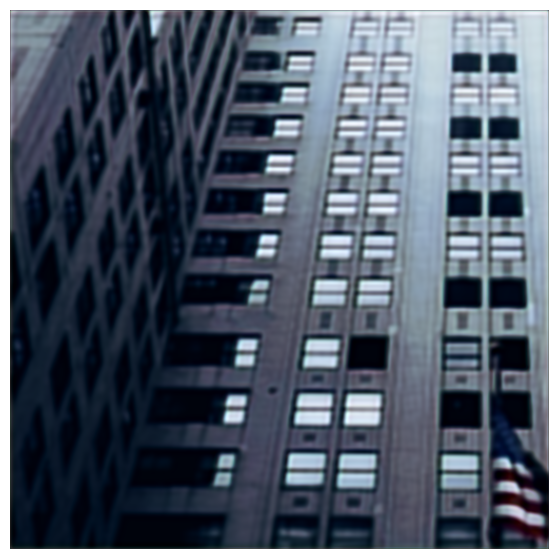

In [177]:
img = result[1].cpu()
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")

In [178]:
result.shape

torch.Size([8, 3, 512, 512])

In [179]:
img.shape

torch.Size([3, 512, 512])

In [180]:
result[1]

tensor([[[0.4179, 0.5905, 0.5567,  ..., 0.6097, 0.5214, 0.4299],
         [0.4916, 0.6544, 0.6984,  ..., 0.7975, 0.7157, 0.5912],
         [0.5504, 0.6975, 0.7171,  ..., 0.8980, 0.8236, 0.6589],
         ...,
         [0.1423, 0.1141, 0.0568,  ..., 0.3065, 0.3450, 0.3238],
         [0.1516, 0.1574, 0.1037,  ..., 0.2944, 0.3125, 0.2864],
         [0.1636, 0.1897, 0.2104,  ..., 0.3173, 0.3576, 0.3048]],

        [[0.4083, 0.5581, 0.5528,  ..., 0.6374, 0.5784, 0.4662],
         [0.5959, 0.7433, 0.7487,  ..., 0.8810, 0.8043, 0.6083],
         [0.5257, 0.7149, 0.6943,  ..., 0.8850, 0.8752, 0.6763],
         ...,
         [0.1449, 0.1355, 0.1001,  ..., 0.3114, 0.3895, 0.3600],
         [0.1609, 0.1537, 0.1396,  ..., 0.3562, 0.3838, 0.3324],
         [0.2221, 0.1932, 0.1842,  ..., 0.3570, 0.4033, 0.3118]],

        [[0.4481, 0.5760, 0.6014,  ..., 0.6377, 0.6344, 0.4707],
         [0.5027, 0.7217, 0.7446,  ..., 0.8320, 0.8213, 0.6135],
         [0.5291, 0.7238, 0.7375,  ..., 0.8866, 0.9097, 0.

In [181]:
img1 = downsample_image(batch)
img1.shape

torch.Size([8, 3, 256, 256])

In [182]:
for param in model.parameters():
    print(param)

Parameter containing:
tensor([[[[-0.0846,  0.1788, -0.1225],
          [ 0.2065,  0.0396, -0.0402],
          [-0.1242,  0.1899,  0.0223]],

         [[-0.0772, -0.2456,  0.0336],
          [ 0.0876, -0.0714, -0.2695],
          [ 0.0876,  0.0130, -0.0415]],

         [[ 0.0449, -0.1203,  0.0290],
          [-0.1599, -0.3497, -0.1569],
          [-0.2811, -0.1503,  0.0004]]],


        [[[-0.0727,  0.0268,  0.0116],
          [ 0.1373, -0.0333, -0.1370],
          [ 0.0624,  0.1866, -0.0312]],

         [[-0.3099, -0.1407, -0.0169],
          [-0.0249, -0.1571, -0.0432],
          [ 0.0551, -0.0593, -0.2941]],

         [[ 0.0599, -0.0006, -0.0906],
          [ 0.0101, -0.1564, -0.0888],
          [-0.1393, -0.2531,  0.0348]]],


        [[[-0.0213, -0.2362, -0.1355],
          [-0.1369, -0.2175, -0.2615],
          [ 0.0728,  0.0316, -0.0626]],

         [[ 0.0308,  0.0558, -0.2177],
          [ 0.0855, -0.2256, -0.2926],
          [-0.0473, -0.1802, -0.0512]],

         [[ 0.0255, -0

In [183]:
loss_fn = torch.nn.MSELoss(reduction='sum')

In [184]:
loss = loss_fn(result, batch.to(device))
loss

tensor(48788.6680)

In [185]:
type(model)

my_upscale_model.UpscaleModel

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 511.5, 511.5, -0.5)

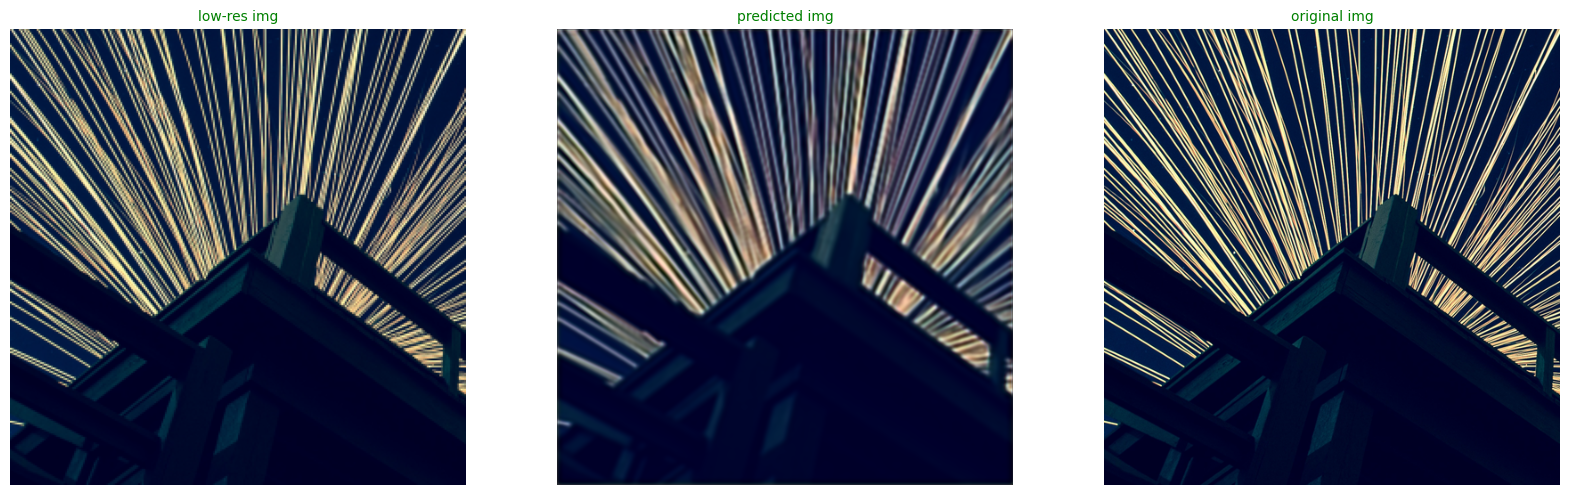

In [186]:
i = 0
y = batch[i]
y_pred = result[i]

# Plot predictions
plt.figure(figsize=(20, 18))
nrows = 1
ncols = 3

plt.subplot(nrows, ncols, 1)
plt.imshow(downsample_image(y.unsqueeze(dim=0)).squeeze().permute(1, 2, 0))
plt.title("low-res img", fontsize=10, c="g") # green text if correct
plt.axis(False)

plt.subplot(nrows, ncols, 2)
plt.imshow(y_pred.permute(1, 2, 0))
plt.title("predicted img", fontsize=10, c="g") # green text if correct
plt.axis(False)

plt.subplot(nrows, ncols, 3)
plt.imshow(y.permute(1, 2, 0))
plt.title("original img", fontsize=10, c="g") # green text if correct
plt.axis(False)